In [1]:
import networkx as nx
import numpy as np

from hiveplot import HivePlot

%matplotlib inline

# Test Set Minor Angle

In [2]:
G = nx.read_gpickle('test_graph.pkl')

In [3]:
groups = [1,2,3]

nodes = dict()

for g in groups:
    nodes[g] = [n for n, d in G.nodes(data=True) if d['group'] == g]
    
nodes_cmap = dict(zip(groups, ['red', 'green', 'blue']))

edges = dict()
edges['group1'] = []
for u,v,d in G.edges(data=True):
    edges['group1'].append((u,v,d))

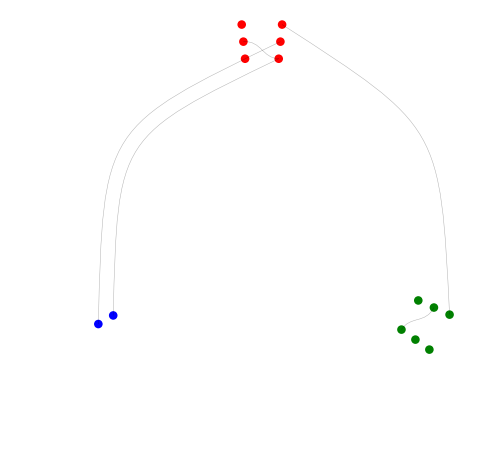

In [4]:
h = HivePlot(nodes, edges, nodes_cmap)
h.set_minor_angle(np.pi / 32)
h.draw()

In [5]:
# Add edge attribute for grouping.
for sc, sk, d in G.edges(data=True):
    if sc > sk:
        G.edge[sc][sk]['order'] = 'backward'
    if sk > sc:
        G.edge[sc][sk]['order'] = 'forward'
        
G.edges(data=True)

edges = dict()
for sc, sk, d in G.edges(data=True):
    if d['order'] not in edges.keys():
        edges[d['order']] = []
    edges[d['order']].append((sc, sk, d))

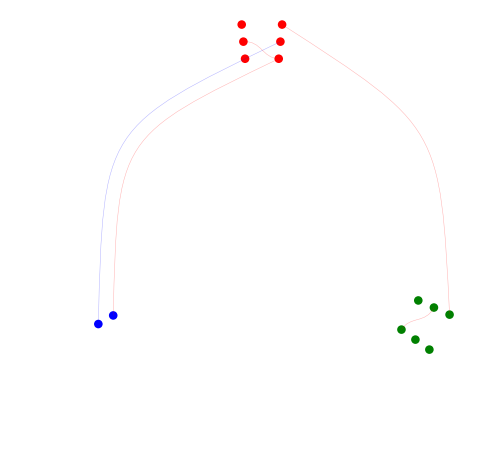

In [6]:
# Test Edges colormap
edge_cmap = dict()
edge_cmap['forward'] = 'red'
edge_cmap['backward'] = 'blue'

h = HivePlot(nodes, edges, nodes_cmap, edge_cmap)
h.set_minor_angle(np.pi / 32)
h.draw()

# Test Two Groups Only

In [7]:
groups = [1, 3]

nodes = dict()
for g in groups:
    nodes[g] = [n for n, d in G.nodes(data=True) if d['group'] == g]
    
nodes_cmap = dict(zip(groups, ['red', 'blue']))

edges = dict()
edges['forward'] = []
edges['backward'] = []
for u,v,d in G.edges(data=True):
    if G.node[u]['group'] in groups and G.node[v]['group'] in groups:
        if d['order'] == 'forward':
            edges['forward'].append((u,v,d))
        else:
            edges['backward'].append((u,v,d))
        


edge_cmap = dict()
edge_cmap['forward'] = 'red'
edge_cmap['backward'] = 'blue'
edges

{'backward': [('h', 'a', {'order': 'backward'})],
 'forward': [('c', 'e', {'order': 'forward'}),
  ('a', 'c', {'order': 'forward'})]}

In [8]:
nodes

{1: ['c', 'a', 'b'], 3: ['e', 'h']}

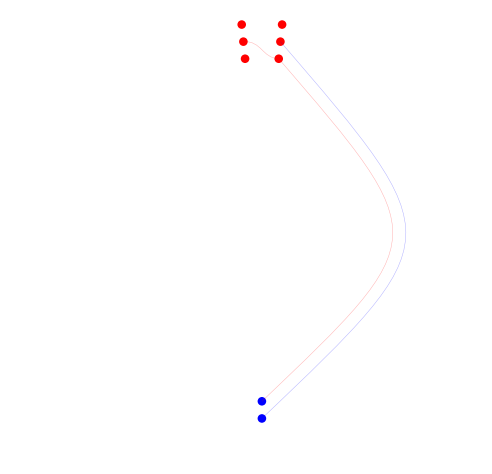

In [9]:
h = HivePlot(nodes, edges, nodes_cmap, edge_cmap)
h.set_minor_angle(np.pi / 32)
h.draw()